In [1]:
import pandas as pd

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

In [2]:
housing.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,...,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,...,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,...,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,...,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,...,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0


In [3]:

# Convert the 'date' column in the 'housing' DataFrame to a regular date format
housing['date'] = pd.to_datetime(housing['date'], format='%Y%m%dT%H%M%S')

# Check the converted dates
# print(housing['date'].head())

# Display the cleaned DataFrame
# print(data_cleaned)
corr_matrix = housing.corr()
print(corr_matrix["price"].sort_values(ascending=False))

price            1.000000
sqft_living      0.703920
grade            0.666447
sqft_above       0.607082
sqft_living15    0.585374
bathrooms        0.527989
view             0.395961
sqft_basement    0.325183
lat              0.307516
bedrooms         0.307281
waterfront       0.260133
floors           0.254428
yr_renovated     0.121534
sqft_lot         0.090317
sqft_lot15       0.082413
yr_built         0.054187
condition        0.035146
long             0.023976
date            -0.001519
id              -0.016081
zipcode         -0.055857
Name: price, dtype: float64


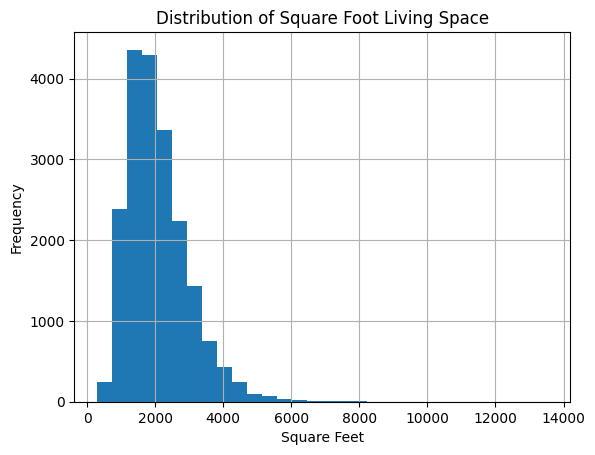

In [11]:
import matplotlib.pyplot as plt

# Plot histograms for key features
housing['sqft_living'].hist(bins=30)
plt.title("Distribution of Square Foot Living Space")
plt.xlabel("Square Feet")
plt.ylabel("Frequency")
plt.show()

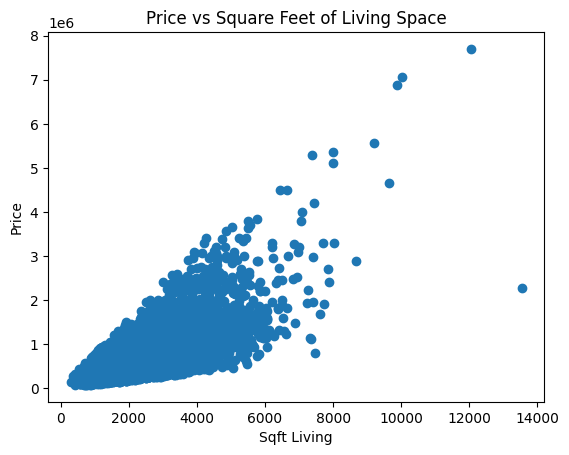

In [5]:
plt.scatter(housing['sqft_living'], housing['price'])
plt.title("Price vs Square Feet of Living Space")
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.show()

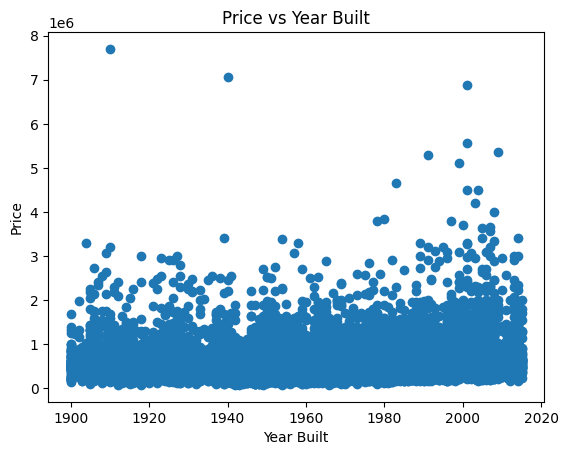

In [6]:
plt.scatter(housing['yr_built'], housing['price'])
plt.title("Price vs Year Built")
plt.xlabel("Year Built")
plt.ylabel("Price")
plt.show()

In [7]:
renovated = housing[housing['yr_renovated'] > 0]
non_renovated = housing[housing['yr_renovated'] == 0]

# Compare average prices
print(renovated['price'].mean())

print(non_renovated['price'].mean())

753032.2714113389
530200.3289343279


Average price by zipcode:
 zipcode
98102    9.050876e+05
98112    1.095133e+06
98040    1.206933e+06
98004    1.361288e+06
98039    2.166618e+06
Name: price, dtype: float64


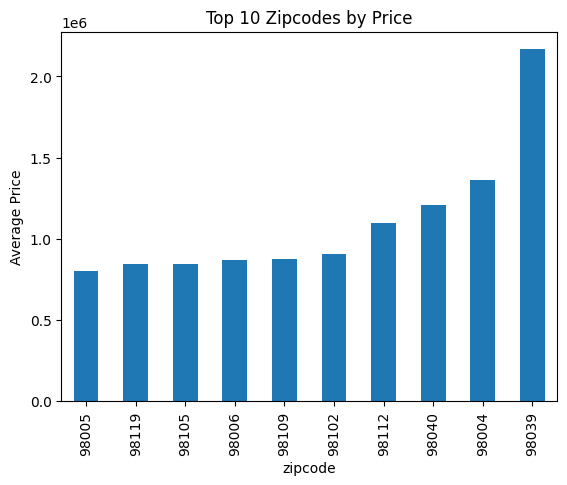

In [8]:
avg_price_by_zipcode = housing.groupby('zipcode')['price'].mean().sort_values(ascending=True)
print("Average price by zipcode:\n", avg_price_by_zipcode.tail())

# Plot top 10 zipcodes with highest average prices
avg_price_by_zipcode.tail(10).plot(kind='bar', title="Top 10 Zipcodes by Price", ylabel="Average Price")
plt.show()

Average price by house condition:
 condition
1    341481.034483
2    329755.521739
3    541420.509014
4    521300.417000
5    608237.002527
Name: price, dtype: float64


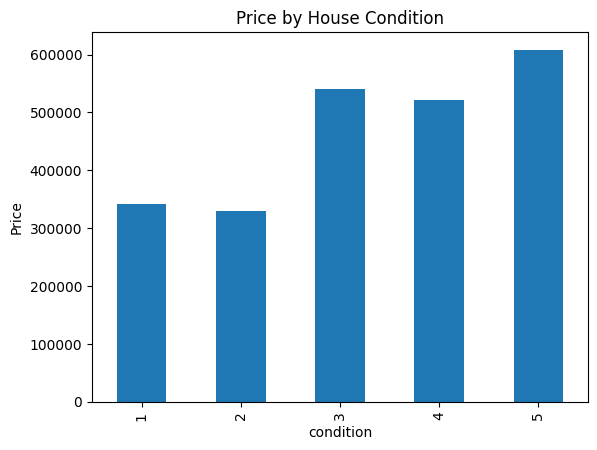

In [9]:
# Average price by house condition
avg_price_by_condition = housing.groupby('condition')['price'].mean()
print("Average price by house condition:\n", avg_price_by_condition)

# Plot price by condition
avg_price_by_condition.plot(kind='bar', title="Price by House Condition", ylabel='Price')
plt.show()

Average price by presence of basement:
 sqft_basement
False    486313.015025
True     622179.250128
Name: price, dtype: float64


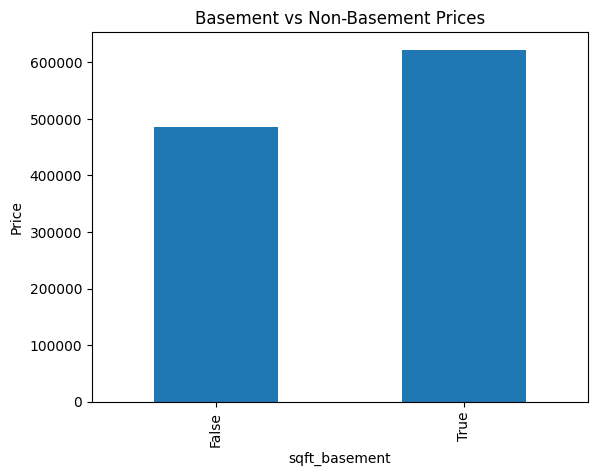

In [10]:
# Compare average prices between homes with and without basements
basement_prices = housing.groupby(housing['sqft_basement'] > 0)['price'].mean()
print("Average price by presence of basement:\n", basement_prices)

# Plotting the difference
basement_prices.plot(kind='bar', title="Basement vs Non-Basement Prices", ylabel='Price')
plt.show()